In [2]:
#importing packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed
buy-and-hold strategy return and risk: 3.69% and 20.12%
RSI strategy return and risk: 6.41% and 7.06%


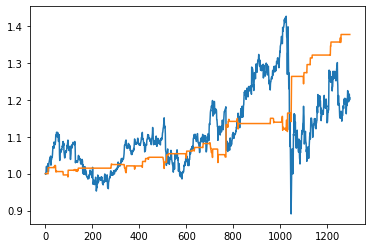

In [9]:
#downloading stock data
stock = 'KO'
data = yf.download(stock, '2016-01-01', '2021-03-21')
#specifying strategy parameters
rsi_period = 14
rsi_oversold = 25
rsi_overbought = 75
fee = 0.0005
#coding technical analysis signals
data['returns'] = data['Close'].pct_change()
data['Up'] = np.maximum(data['Close'].diff(),0)
data['Down'] = np.maximum(-data['Close'].diff(),0)
data['RS'] = data['Up'].rolling(rsi_period).mean()/data['Down'].rolling(rsi_period).mean()
data['RSI'] = 100 - 100/(1 + data['RS'])
#simulating trading strategies
start = rsi_period
data['signal'] = 1*(data['RSI'] < rsi_oversold) - 1*(data['RSI'] > rsi_overbought)
BnH_return = np.array(data['returns'][start+1:])
RSI_return = np.array(data['returns'][start+1:])*np.array(data['signal'][start:-1]) - fee*abs(np.array(data['signal'][start+1:])-np.array(data['signal'][start:-1]))
BnH = np.prod(1+BnH_return)**(252/len(BnH_return)) - 1
RSI = np.prod(1+RSI_return)**(252/len(RSI_return)) - 1
BnH_risk = np.std(BnH_return)*(252)**(1/2)
RSI_risk = np.std(RSI_return)*(252)**(1/2)
#visualising the results
print('buy-and-hold strategy return and risk: '+str(round(BnH*100,2))+'% and '+str(round(BnH_risk*100,2))+'%')
print('RSI strategy return and risk: '+str(round(RSI*100,2))+'% and '+str(round(RSI_risk*100,2))+'%')
plt.plot(np.append(1,np.cumprod(1+BnH_return)))
plt.plot(np.append(1,np.cumprod(1+RSI_return)))